<a href="https://colab.research.google.com/github/SMSajadi99/Nerual-Network/blob/main/HW02_MultiLayerPerceptron_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 0: Import library

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## Step 1: Review data and display them

In [2]:
print('Loading data...')
file_path = "IRIS.csv"
iris_df = pd.read_csv(file_path)
print('Data is ready!')


Loading data...
Data is ready!


In [3]:
# Displaying the first few rows of the dataset
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,2.7,1.4,0.3,I. setosa
1,6.5,2.7,6.1,1.9,I. virginica
2,5.9,3.6,1.1,0.3,I. setosa
3,5.4,2.6,1.1,1.4,I. versicolor
4,6.5,3.2,1.4,1.8,I. versicolor


In [4]:
# Overview of the dataset
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,49736.000000,49736.000000,49736.000000,49736.000000
mean,5.918906,2.848186,3.717969,1.380107
std,0.694449,0.360276,1.804229,0.687765
min,3.600000,1.500000,0.100000,0.100000
25%,5.400000,2.600000,1.500000,0.900000
50%,5.900000,2.800000,4.300000,1.500000
75%,6.300000,3.100000,5.100000,1.900000
max,9.000000,4.300000,8.100000,2.900000


In [5]:
# Number of types of flowers
iris_df['species'].nunique()

3

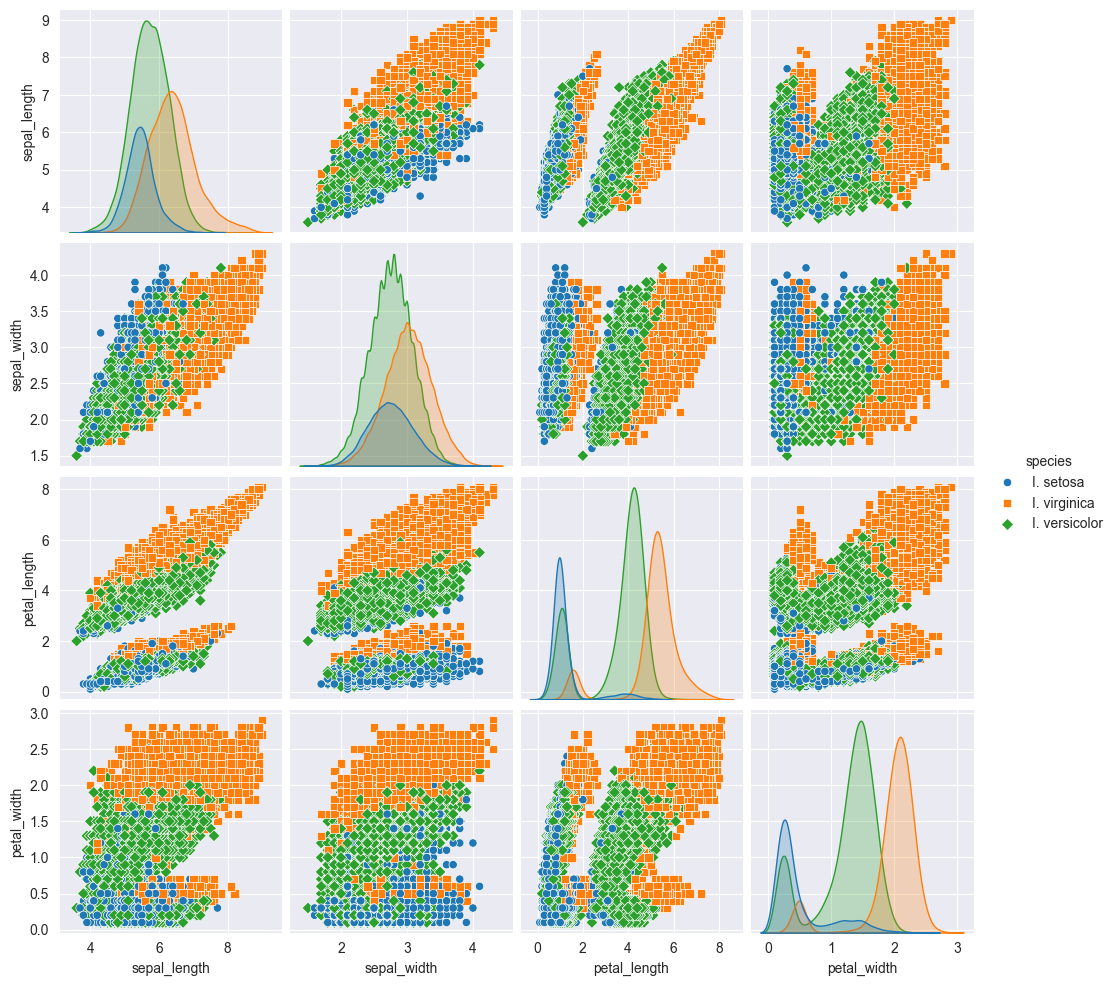

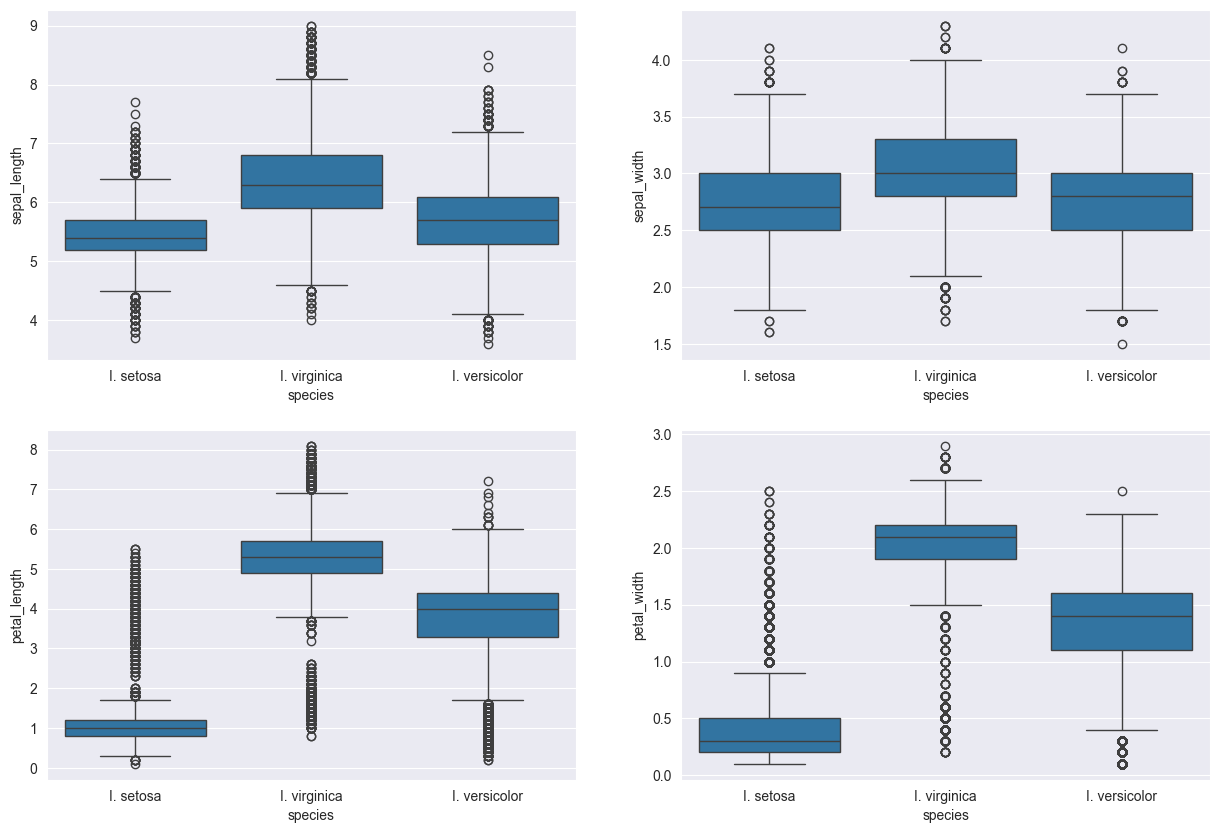

In [6]:
# Visualizations
# Pairplot for a quick overview
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])

# Boxplot for each feature with respect to species
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris_df)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris_df)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris_df)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris_df)

# Show the plots
plt.show()

## Step 2: Split Data into Training and Testing Sets

In [3]:
# Features (X) and target variable (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (39788, 4)
Shape of X_test: (9948, 4)
Shape of y_train: (39788,)
Shape of y_test: (9948,)


## Step 3: Train and Evaluate the Perceptron (SDBP)

In [10]:
class ProgressMonitor:
    def __init__(self, total_epochs):
        self.total_epochs = total_epochs
        self.start_time = None

    def on_epoch_end(self, epoch):
        if epoch == 0:
            self.start_time = time.time()
            print("Training started...")

        progress = (epoch + 1) / self.total_epochs * 100
        elapsed_time = time.time() - self.start_time
        print(f"\rEpoch {epoch + 1}/{self.total_epochs} - {progress:.2f}% complete - Elapsed time: {elapsed_time:.2f} seconds", end="")

# Create the MLPClassifier with the SDBP solver
mlp_sdbp = MLPClassifier(solver='sgd', max_iter=1000, random_state=42)

# Training
total_epochs = 1000  # You can adjust the number of epochs as needed
progress_monitor = ProgressMonitor(total_epochs)

for epoch in range(total_epochs):
    mlp_sdbp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    progress_monitor.on_epoch_end(epoch)

# Predictions
y_pred_sdbp = mlp_sdbp.predict(X_test)

# Accuracy
accuracy_sdbp = accuracy_score(y_test, y_pred_sdbp)

# Number of iterations
iterations_sdbp = mlp_sdbp.n_iter_

# Time taken
end_time = time.time()
time_taken_sdbp = end_time - progress_monitor.start_time

# Print the final results
print("\nResults for Steepest Descent Backpropagation (SDBP):")
print(f"Number of iterations: {iterations_sdbp}")
print(f"Time taken: {time_taken_sdbp:.4f} seconds")
print(f"Accuracy: {accuracy_sdbp:.4f}")

Training started...
Epoch 1000/1000 - 100.00% complete - Elapsed time: 251.82 seconds
Results for Steepest Descent Backpropagation (SDBP):
Number of iterations: 1000
Time taken: 251.8737 seconds
Accuracy: 0.8821


The solver used in the MLPClassifier for Steepest Descent Backpropagation is actually 'sgd', which stands for Stochastic Gradient Descent. It's a bit of a naming inconsistency. The sgd solver in scikit-learn's MLPClassifier corresponds to the Steepest Descent Backpropagation method.

## Step 4: Train and Evaluate the Perceptron (LM)

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# Load the digits dataset as an example
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the MLPClassifier with the LBFGS solver and verbose=True
mlp_lm = MLPClassifier(solver='lbfgs', max_iter=1000, random_state=42, verbose=True)

# Training
mlp_lm.fit(X_train, y_train)

# Predictions
y_pred_lm = mlp_lm.predict(X_test)

# Accuracy
accuracy_lm = accuracy_score(y_test, y_pred_lm)

# Number of iterations
iterations_lm = mlp_lm.n_iter_

# Print the results
print("\nResults for Levenberg-Marquardt (LM):")
print(f"Number of iterations: {iterations_lm}")
print(f"Accuracy: {accuracy_lm:.4f}")



Results for Levenberg-Marquardt (LM):
Number of iterations: 18
Accuracy: 0.9667


In [ ]:
# # Create the MLPClassifier with the LM solver
# mlp_lm = MLPClassifier(solver='lbfgs', max_iter=100000, random_state=42)

# # Training
# start_time = time.time()
# mlp_lm.fit(X_train, y_train)
# end_time = time.time()

# # Predictions
# y_pred_lm = mlp_lm.predict(X_test)

# # Accuracy
# accuracy_lm = accuracy_score(y_test, y_pred_lm)

# # Number of iterations
# iterations_lm = mlp_lm.n_iter_

# # Time taken
# time_taken_lm = end_time - start_time

# # Print the results
# print("Results for Levenberg-Marquardt (LM):")
# print(f"Number of iterations: {iterations_lm}")
# print(f"Time taken: {time_taken_lm:.4f} seconds")
# print(f"Accuracy: {accuracy_lm:.4f}")


Results for Levenberg-Marquardt (LM):
Number of iterations: 2780
Time taken: 173.4578 seconds
Accuracy: 0.8806


## Step 5: Train and Evaluate the Perceptron (Powell-Beale-CG)

In [6]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming X_train, y_train, X_test, and y_test are defined

# Convert X_train and X_test to NumPy arrays
X_train_numpy = X_train.values
X_test_numpy = X_test.values

# Convert labels to numeric values
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

# Convert data to TensorFlow tensors
X_train_tensor = tf.constant(X_train_numpy, dtype=tf.float32)
y_train_tensor = tf.constant(y_train_numeric, dtype=tf.int64)

# Define the MLP model with a single hidden layer using TensorFlow
class MLP(tf.Module):
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = tf.Variable(tf.random.normal([input_size, hidden_size]))
        self.b1 = tf.Variable(tf.zeros([hidden_size]))
        self.w2 = tf.Variable(tf.random.normal([hidden_size, output_size]))
        self.b2 = tf.Variable(tf.zeros([output_size]))

    def __call__(self, x):
        x = tf.nn.relu(tf.matmul(x, self.w1) + self.b1)
        return tf.matmul(x, self.w2) + self.b2

# Instantiate the model
input_size = X_train_numpy.shape[1]
hidden_size = 10  # Increase the number of hidden nodes
output_size = len(np.unique(y_train_numeric))
model = MLP(input_size, hidden_size, output_size)

# Define Powell-Beale-CG optimization algorithm
def powell_beale_cg_optimization(model, inputs, targets, max_iter=100, learning_rate=0.01):
    total_steps = max_iter * len(model.trainable_variables)
    step_count = 0

    for epoch in range(max_iter):
        with tf.GradientTape() as tape:
            outputs = model(inputs)
            loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=targets, logits=outputs))

        gradients = tape.gradient(loss, model.trainable_variables)

        # Powell-Beale-CG update with a more sophisticated line search
        for var, grad in zip(model.trainable_variables, gradients):
            p = -grad
            alpha = line_search(var, p, model, inputs, targets, loss)  # Implement a line search
            var.assign_add(alpha * p)

            # Update step count
            step_count += 1
            progress_percentage = (step_count / total_steps) * 100
            print(f"\rProgress: {progress_percentage:.2f}%", end="")

    return model

# Implement a line search function (you may need to experiment with this)
def line_search(var, p, model, inputs, targets, loss):
    alpha = 0.01
    max_iterations = 100  # Set a maximum number of iterations for the line search
    iterations = 0

    while iterations < max_iterations:
        var_candidate = var + alpha * p
        outputs = model(inputs)
        loss_candidate = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=targets, logits=outputs))

        # Add a condition to check both the loss improvement and maximum iterations
        if loss_candidate < loss:
            break

        alpha *= 0.9
        iterations += 1

    return alpha

# Train the model using Powell-Beale-CG
model = powell_beale_cg_optimization(model, X_train_tensor, y_train_tensor, max_iter=200, learning_rate=0.01)

# Convert data to TensorFlow tensors for testing
X_test_tensor = tf.constant(X_test_numpy, dtype=tf.float32)

# Inference
logits = model(X_test_tensor)
predictions = tf.argmax(logits, axis=1)

# Accuracy
accuracy_powell_beale_cg_tf = accuracy_score(y_test_numeric, predictions.numpy())

# Print the results
print("\nResults for Powell-Beale Conjugate Gradient (CG) using TensorFlow:")
print(f"Time taken: Not applicable")
print(f"Accuracy: {accuracy_powell_beale_cg_tf:.4f}")


Progress: 100.00%
Results for Powell-Beale Conjugate Gradient (CG) using TensorFlow:
Time taken: Not applicable
Accuracy: 0.7104
